In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib
%matplotlib inline

In [ ]:
data=pd.read_csv('Car_sale_ads.csv', engine='python',sep=',', quotechar='"', error_bad_lines=False)
data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#to see the correlation between our int and float features
data.corr()

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
Index,1.000000,-0.121988,0.023515,0.000227,-0.251562,-0.235016,-0.003387,0.088291
Price,-0.121988,1.000000,0.423281,-0.016839,0.647016,0.372470,-0.001410,-0.052599
Production_year,0.023515,0.423281,1.000000,-0.043911,0.158159,-0.165258,-0.008502,0.253362
Mileage_km,0.000227,-0.016839,-0.043911,1.000000,-0.005332,0.004847,0.005191,-0.007138
Power_HP,-0.251562,0.647016,0.158159,-0.005332,1.000000,0.820443,0.012598,-0.167089
Displacement_cm3,-0.235016,0.372470,-0.165258,0.004847,0.820443,1.000000,0.020940,-0.224790
CO2_emissions,-0.003387,-0.001410,-0.008502,0.005191,0.012598,0.020940,1.000000,-0.004329
Doors_number,0.088291,-0.052599,0.253362,-0.007138,-0.167089,-0.224790,-0.004329,1.000000


we can see that price and power_HP feature are moderately positively related.
and power_HP and displacement feature are moderately positively related.

In [ ]:
data=data.drop(['Vehicle_version', 'Vehicle_generation','First_owner','First_registration_date','Offer_publication_date','Offer_location'], axis=1)
data.head()


,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,Features
0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,NaN,Front wheels,Manual,small_cars,3.0,gray,NaN,[]
1,1,43500,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,NaN,Front wheels,Manual,coupe,2.0,silver,NaN,[]
2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,NaN,NaN,Automatic,small_cars,3.0,silver,NaN,"['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,139.0,Front wheels,Manual,small_cars,3.0,gray,NaN,"['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,NaN,NaN,Manual,small_cars,3.0,blue,NaN,"['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [ ]:
data['Vehicle_brand'].value_counts().to_frame()

,Vehicle_brand
BMW,16983
Audi,16730
Opel,16322
Ford,16007
Mercedes-Benz,12170
...,...
Santana,1
Wołga,1
FAW,1
NSU,1


In [ ]:
data['Vehicle_model'].value_counts().to_frame()

,Vehicle_model
Astra,5302
A4,4582
Seria 3,4570
Octavia,3914
Focus,3678
...,...
Orion,1
Corniche,1
Park Ward,1
827,1


In [ ]:
data['Type'].value_counts().to_frame()

,Type
SUV,36798
station_wagon,32794
sedan,28655
compact,26962
city_cars,21651
minivan,18131
coupe,6168
small_cars,5089
convertible,2308


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


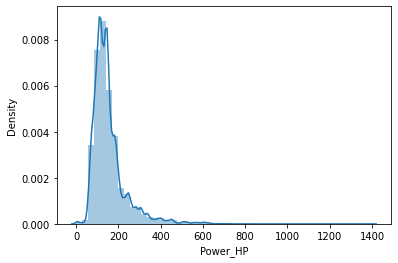

In [ ]:
sns.distplot(data['Power_HP']);
#to visualize distribution of power_hp

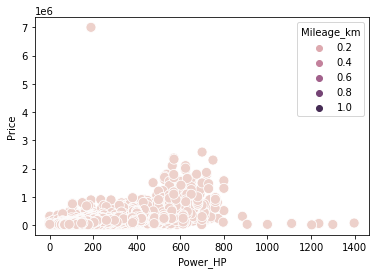

In [ ]:
sns.scatterplot(data=data,x=data['Power_HP'], y=data['Price'],hue=data['Mileage_km'],s=100);
#since we found a correlation between power_hp and price and power_hp and mileage
#we wanted to visualize this correlation through a scatter plot including all 3 features

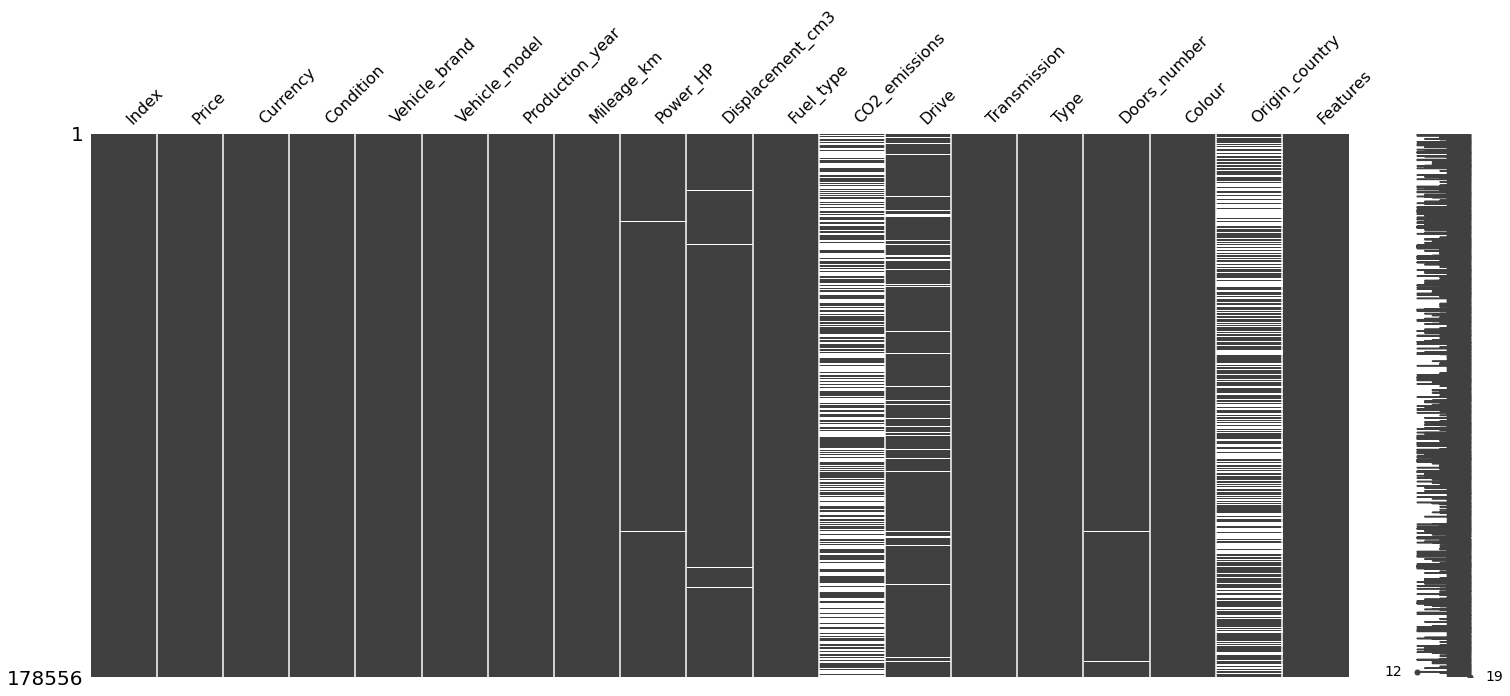

In [ ]:
#here we want to visualize the whole dataset highlighting the missing values and there exact place.
import missingno as msno

msno.matrix(data)

In [ ]:
# # Imputing with KNNImputer
# # handling missing values of CO2 emissions
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import MinMaxScaler

# #Define a subset of the dataset
# data_knn = data.filter(['CO2_emissions'], axis=1).copy()

# # Define scaler to set values between 0 and 1

# scaler = MinMaxScaler(feature_range=(0, 1))
# data_knn = pd.DataFrame(scaler.fit_transform(data_knn), columns = data_knn.columns)

# # Define KNN imputer and fill missing values
# knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(data_knn), columns=data_knn.columns)


In [ ]:
# sns.set_theme(style="ticks")

# f, ax = plt.subplots(figsize=(6, 5),dpi=150)
# ax.set_xscale("log")

# # Plot the orbital period with horizontal boxes
# sns.boxplot(x="Price", y="Displacement_cm3", data=data,
#             whis=[0, 100], width=0.5, palette="vlag")

# # Add in points to show each observation
# sns.stripplot(x="Price", y="Displacement_cm3", data=data,
#               size=0.3, color="0.5", linewidth=0)

# # Tweak the visual presentation
# plt.xticks(fontsize = 7)
# plt.xlabel("")

# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)

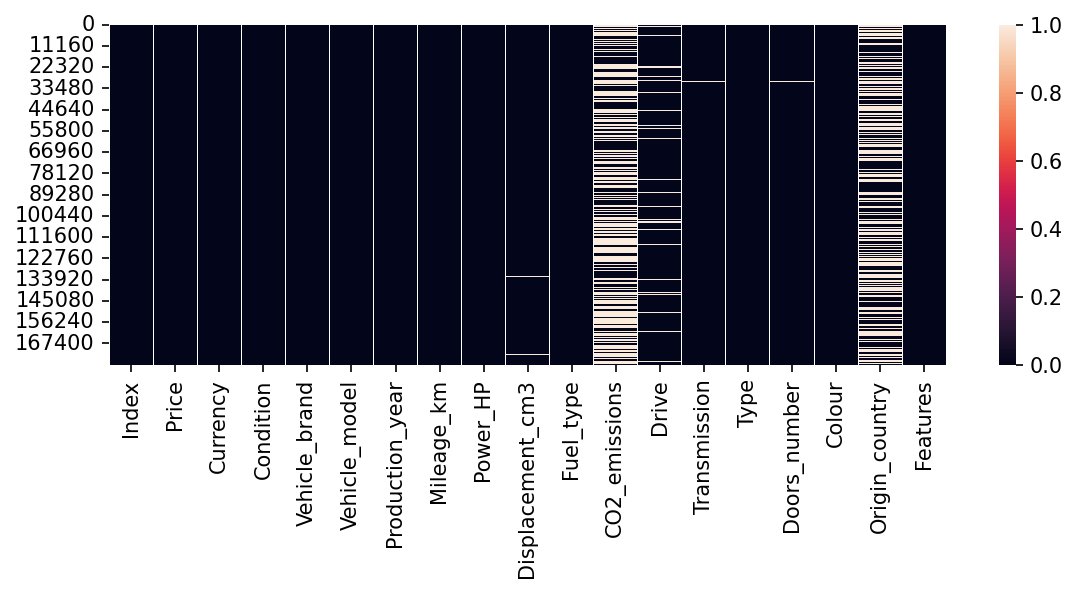

In [ ]:
#visualization of null values same as code above but adding a heatmap legend to the plot
plt.figure(figsize=(9,3),dpi=150)
sns.heatmap(data.isnull())

In [ ]:
#drop these cols as they have a high percentage of missing values and since we don't use them
#in our research questions we created a new data excluded them
data_car = data.drop(['Vehicle_version', 'Vehicle_generation','Origin_country', 'First_owner','First_registration_date'], axis=1)
data_car = data_car.dropna(axis=0)
print("Count of null : ", data_car.isnull().sum().sum())

we coded a function for Detecting missing values numerically and aiming to present them as a table with the column along with it's exact number of missing values and the percentage of missing values

In [ ]:
def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
data_nulls= missing_values_table(data)
data_nulls

Your selected dataframe has 25 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
First_owner,143210,68.8
First_registration_date,121859,58.5
CO2_emissions,114257,54.9
Origin_country,89992,43.2
Vehicle_version,70222,33.7
Vehicle_generation,60444,29.0
Drive,15076,7.2
Displacement_cm3,1966,0.9
Doors_number,1487,0.7
Mileage_km,983,0.5


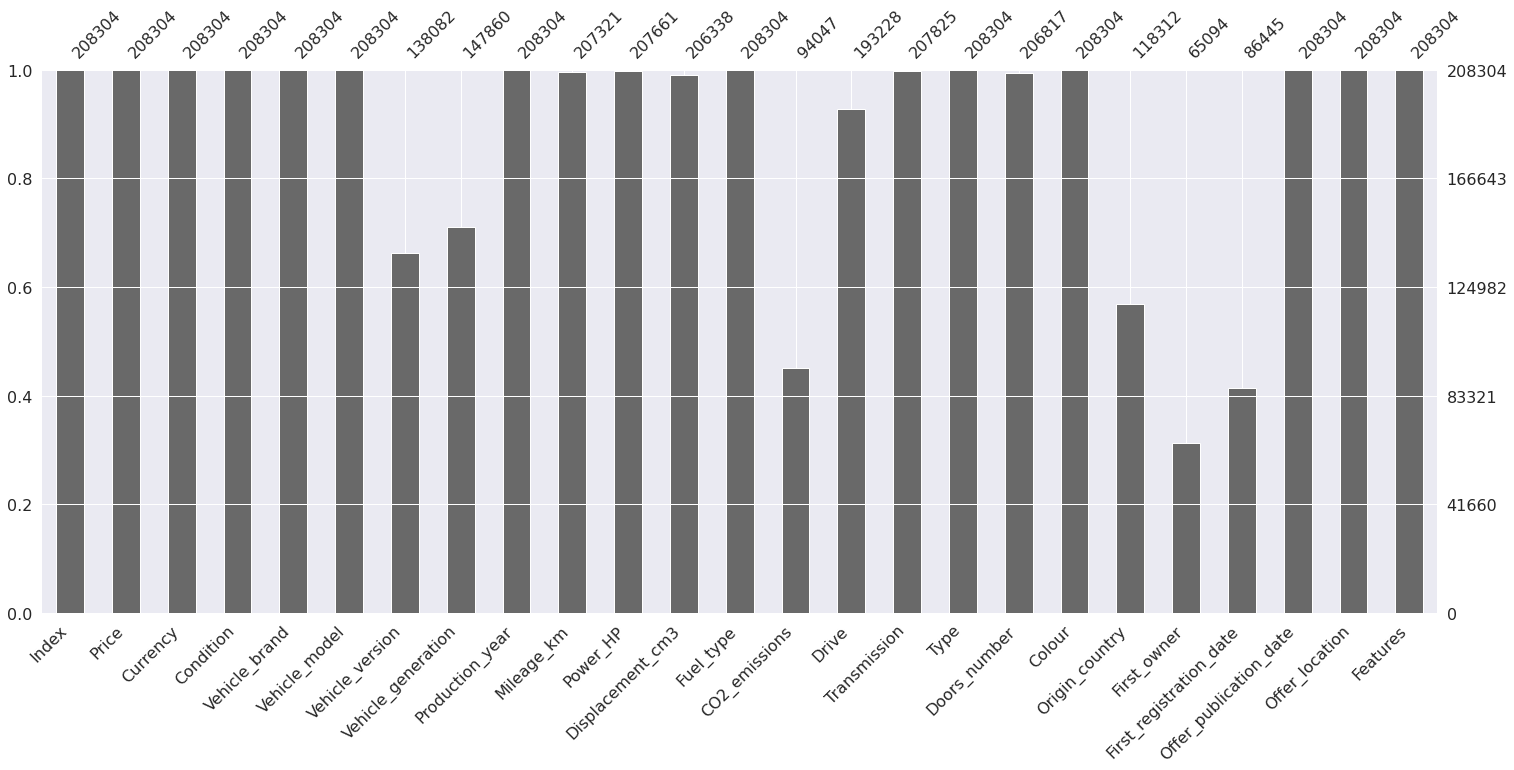

In [ ]:
#Detecting missing data visually using Missingno library
import missingno as msno
msno.bar(data)

The bar chart above gives a quick graphical overview of the completeness of the dataset. We can see that Vehicle version, Vehicle generation, CO2 emissions, Drive, Origin country, first owner,and first regestration date columns have missing values. Next,it would make sense to find out the locations of the missing data.

In [ ]:
#Visualizing the locations of the missing data
msno.matrix(data)

👆🏻
The plot appears blank(white) wherever there are missing values. For instance, in Mileage_km column there are only three instances of missing data, hence the two white lines.

The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum nullities and the total number of columns in a given dataset, at the bottom.

It is also possible to sample the dataset to pinpoint the exact location of the missing values. For instance let's check the first 100 rows.

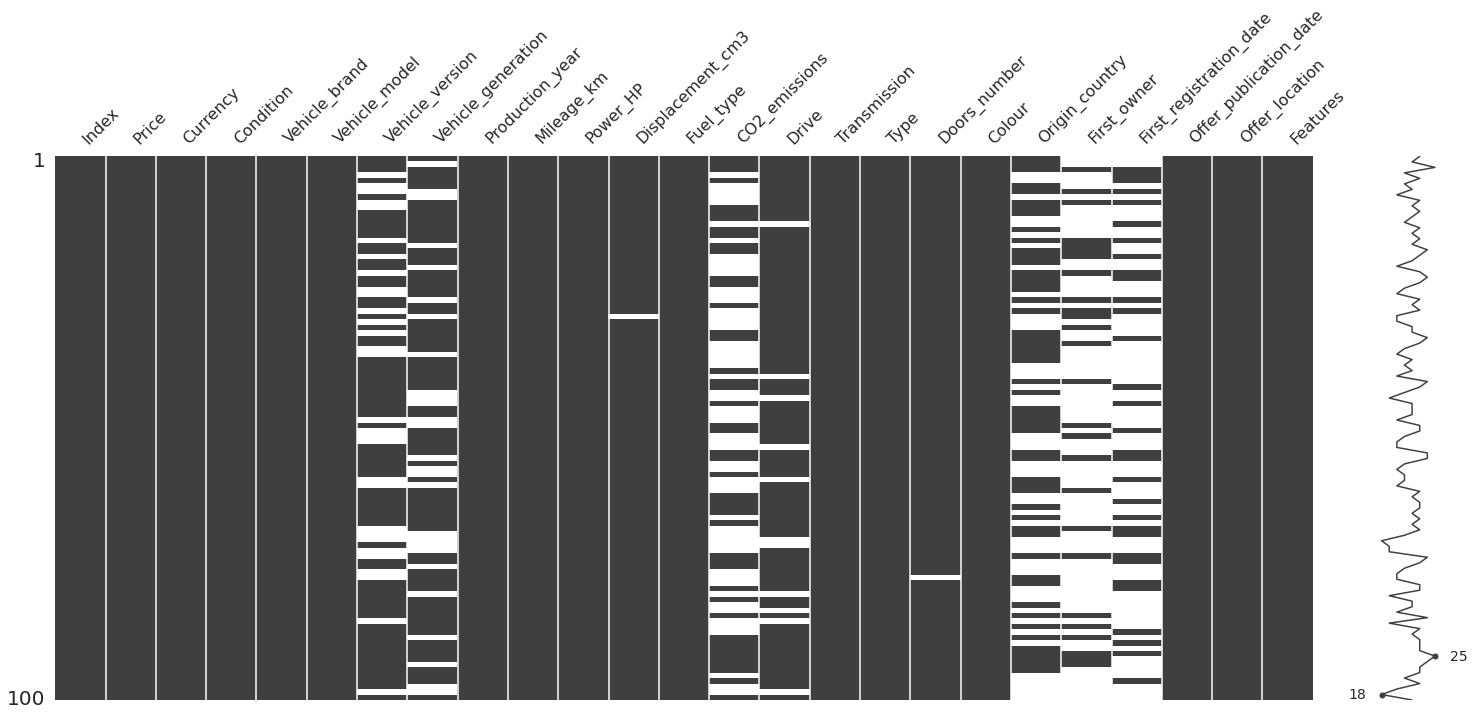

In [ ]:
msno.matrix(data.sample(100))

👆🏻This shows that the Mileage column has no nullity in the first 100 cases.

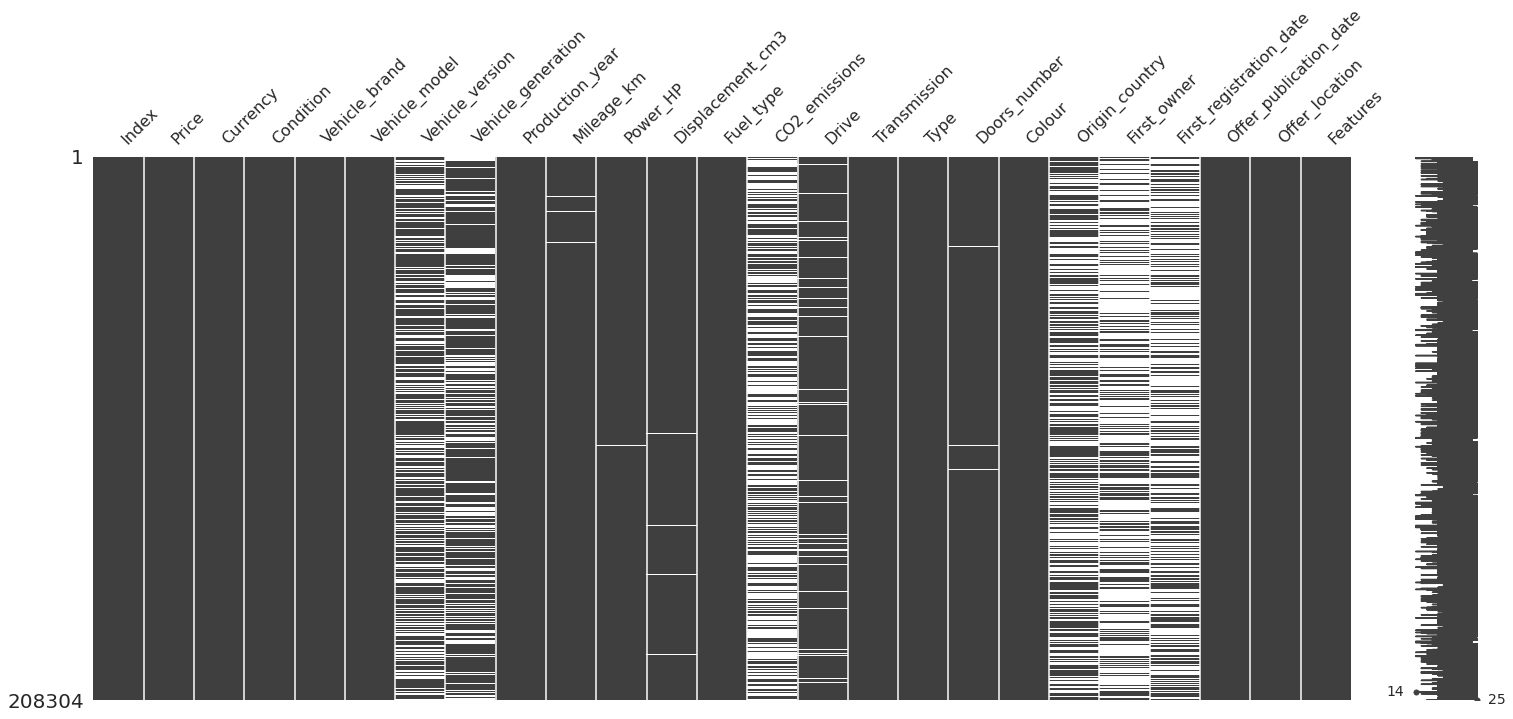

In [ ]:
#Finding reason for missing data using matrix plot
msno.matrix(data)

👆🏻The Mileage_km, Power_HP, Displacement_cm3, and Doors_number Columns have very few missing values, Hence, the missingness in  Mileage_km, Power_HP, Displacement_cm3, Drive, and Doors_number Columns can be attributed as Missing Completely at Random.
First_registration_date, First_owner, Origin_country, CO2_emissions, vehicle_generation, and vehicle_version columns have a lot of missing values.This could be a case of MAR as we cannot directly observe the reason for missingness of data in these columns.

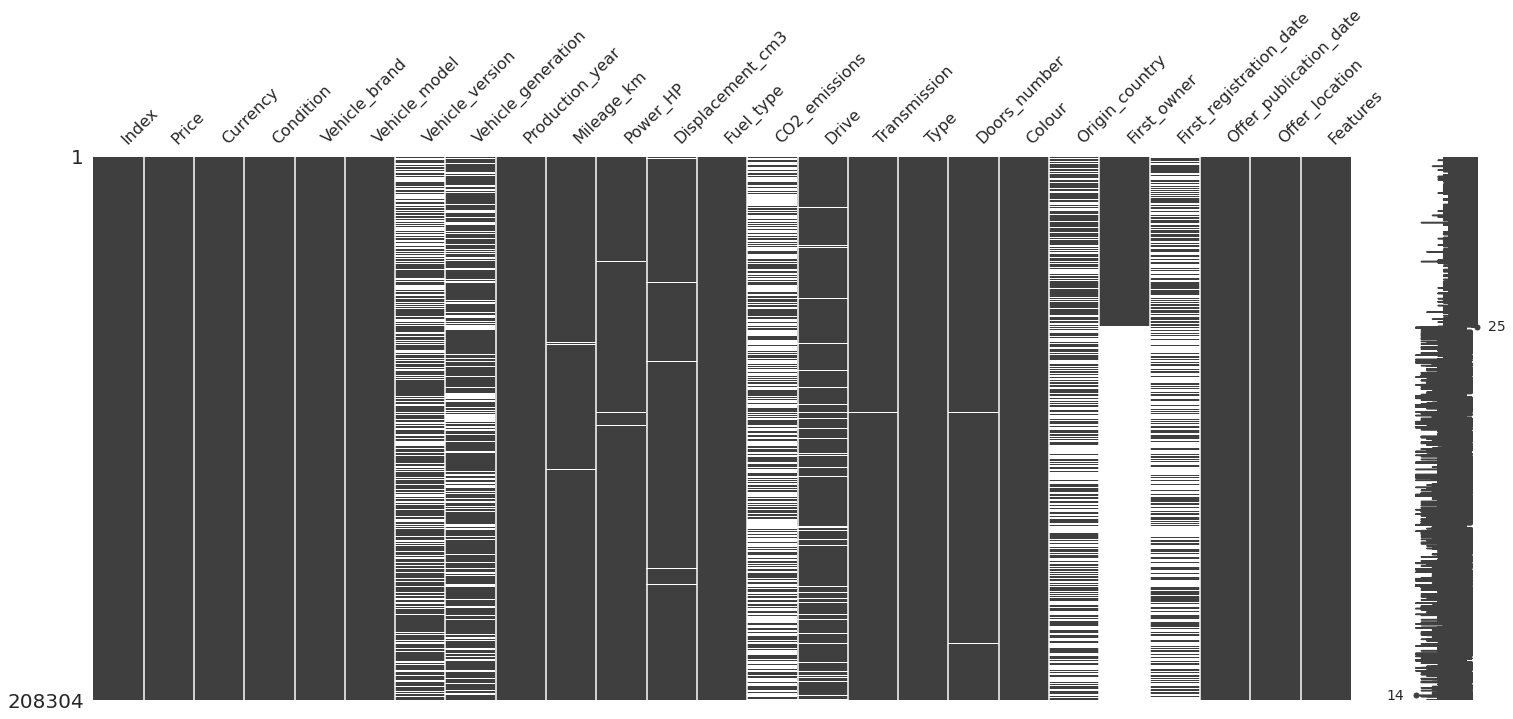

In [ ]:
#The missingno package also let's us sort the graph by a particluar column.
#Let's sort the values by first owner and first registeration date column
#to see if there is a pattern in the missing values
#sorted by first owner
sorted = data.sort_values('First_owner')
msno.matrix(sorted)

👆🏻Hence it is clear that here is no relation between the missingness in first owner and first registeration date column.

To cement this conclusion further we can also draw a Heatmap among the different variables in the dataset.

In [ ]:
#Finding reason for missing data using a Heatmap
msno.heatmap(data)

👆🏻 needs a comment --
there is a moderate to strong relationship between the missing values in (vehicle_version & CO2_emissions). Also,there is a strong relationship between the missing values in (Power_HP & Transmission). Further,there are mild relationships in missing values between (Power_Hp & Doors_number)and(Transmission & Doors_number).Finally,a weak relationship between the missing values in(Power_HP & Displacement_cm3)and (Displacement_cm3 & Transmission).The rest can be ignored since there is a very weak correlation between them.


In [ ]:
#Finding reason for missing data using Dendrogram
msno.dendrogram(data)

👆🏻Let's read the above dendrogram from a top-down perspective:

Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on.

the missingness of vehicle generation tends to be more similar to Drive than to Displacement_cm3 and so on.However, in this particluar case, the correlation is low since vehicle generation column has a high missing values.

**Treating Missing values**

1 - Pairwise Deletion

2- Listwise Deletion/ Dropping rows

3- Dropping complete columns


**Parwise Deletion:**

is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted. All operations in pandas like mean,sum etc intrinsically skip missing values.

In [ ]:
#Pairwise Deletion
data.isnull().sum()

In [ ]:
#(that have a few missing values)
#Mileage_km, Power_HP, Displacement_cm3, and Doors_number Columns
# 1. Mileage_km
data_1 = data.copy()
data_1['Mileage_km'].mean() #pandas skips the missing values and calculates mean of the remaining values.

In [ ]:
# 2. Power_HP
data_1 = data.copy()
data_1['Power_HP'].mean()

In [ ]:
# 3. Displacement_cm3
data_1 = data.copy()
data_1['Displacement_cm3'].mean()

In [ ]:
# 4. Doors_number
data_1 = data.copy()
data_1['Doors_number'].mean()

**Listwise Deletion/ Dropping rows**

During Listwise deletion, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values.

In [ ]:

#Drop rows which contains any NaN or missing value for Age column
data_1.dropna(subset=['Drive'],how='any',inplace=True)
data_1['Drive'].isnull().sum()

👆🏻The Drive column doesn't have any missing values.A major diadvantage of Listwise deletion is that a major chunk of data and hence a lot of information is lost.

 Hence, it is advisable to use it only when the number of missing values is very small.

**Dropping complete columns**

If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.

In [ ]:
#First_registration_date, First_owner, Origin_country, CO2_emissions,
# vehicle_generation, and vehicle_version
data.drop(['First_registration_date'], axis=1)

In [ ]:
data.drop(['First_owner'], axis=1)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Front wheels,Manual,small_cars,3.0,gray,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Front wheels,Manual,coupe,2.0,silver,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,NaN,Automatic,small_cars,3.0,silver,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Front wheels,Manual,small_cars,3.0,gray,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,NaN,Manual,small_cars,3.0,blue,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,NaN,NaN,2014,40000.0,...,NaN,Manual,small_cars,1.0,other,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,NaN,NaN,1970,63518.0,...,Rear wheels,Manual,station_wagon,4.0,other,Poland,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,NaN,NaN,1977,11880.0,...,NaN,Manual,SUV,3.0,red,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,NaN,NaN,1986,100000.0,...,NaN,Manual,minivan,2.0,blue,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


In [ ]:
data.drop(['Origin_country'], axis=1)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Drive,Transmission,Type,Doors_number,Colour,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Front wheels,Manual,small_cars,3.0,gray,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Front wheels,Manual,coupe,2.0,silver,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,NaN,Automatic,small_cars,3.0,silver,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Front wheels,Manual,small_cars,3.0,gray,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,NaN,Manual,small_cars,3.0,blue,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,NaN,NaN,2014,40000.0,...,NaN,Manual,small_cars,1.0,other,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,NaN,NaN,1970,63518.0,...,Rear wheels,Manual,station_wagon,4.0,other,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,NaN,NaN,1977,11880.0,...,NaN,Manual,SUV,3.0,red,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,NaN,NaN,1986,100000.0,...,NaN,Manual,minivan,2.0,blue,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


In [ ]:
data.drop(['Vehicle_generation'], axis=1)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Production_year,Mileage_km,Power_HP,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,2021,1.0,145.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,1974,59000.0,75.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,2018,52000.0,180.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,2012,29000.0,160.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,2021,600.0,165.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,NaN,2014,40000.0,173.0,...,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,NaN,1970,63518.0,70.0,...,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,NaN,1977,11880.0,60.0,...,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,NaN,1986,100000.0,36.0,...,Manual,minivan,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


In [ ]:
data.drop(['Vehicle_version'], axis=1)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_generation,Production_year,Mileage_km,Power_HP,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,2021,1.0,145.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,1974,59000.0,75.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,2018,52000.0,180.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,2012,29000.0,160.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,2021,600.0,165.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,NaN,2014,40000.0,173.0,...,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,NaN,1970,63518.0,70.0,...,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,NaN,1977,11880.0,60.0,...,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,NaN,1986,100000.0,36.0,...,Manual,minivan,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


**Basic Imputation Techniques**

- 'ffill' or 'pad' - Replace NaN s with last observed value

- 'bfill' or 'backfill' - Replace NaN s with next observed value

- Linear interpolation method

In [ ]:
data_missing= missing_values_table(data)
data_missing

NameError: ignored

👆🏻There are a lot of missing values and some of the columns like First owner and CO2 emissions have more than 50% of the values missing. Let's now see how we can impute these missing values.

In [ ]:
data.shape

In [ ]:
# Imputation using ffill/pad
# Imputing CO2 emissions value

data['CO2_emissions'][0:208305]

In [ ]:
# Imputing CO2_emissions value

data['CO2_emissions'][0:208305]

In [ ]:
data.fillna(method='ffill',inplace=True)
data['CO2_emissions'][0:208305]

In [ ]:
data['CO2_emissions'][0:5]

we can see that the first 3 rows are null values, so we'll use the linear imputaion

**Linear interpolation**

 is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

In [ ]:
# Interpolate using the linear method for the first 3 rows
data.interpolate(limit_direction="both",inplace=True)
data['CO2_emissions'][0:4]

In [ ]:
data.interpolate(limit_direction="both",inplace=True)
data['CO2_emissions'][0:208305]

#**For the following code sniplets, we decided to create boxplots for all attributes that are of type float or int to help us in visualizing the outliers-*`Univariate Outlier Handling`***

[Text(0.5, 1.0, 'Price Distribution')]

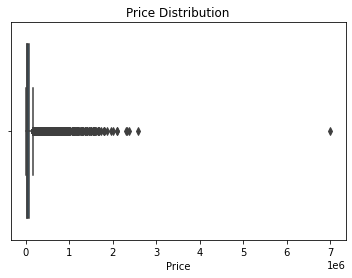

In [ ]:
sns.boxplot( data= data, x=data["Price"] ).set(title='Price Distribution')



👆 Since we detected an outlier in the price column, we will handle it in the following code:

In [ ]:
#Finding the IQR
price=data['Price']
percentile25 = price.quantile(0.25)
percentile75 = price.quantile(0.75)
iqr=percentile75-percentile25

In [ ]:
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
#Finding Outliers
price > upper_limit
price < lower_limit

In [ ]:
#Trimming

new_data =data[price < upper_limit]
new_data

In [ ]:
#Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Price'])
plt.subplot(2,2,2)
sns.boxplot(data['Price'])
plt.subplot(2,2,3)
sns.distplot(new_data['Price'])
plt.subplot(2,2,4)
sns.boxplot(new_data['Price'])
plt.show()

In [ ]:
#Capping
new_df_cap = data.copy()
new_df_cap['Price'] = np.where(
    new_df_cap['Price'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Price'] < lower_limit,
        lower_limit,
        new_df_cap['Price']
    )
)

In [ ]:
#Compare the plots after capping
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Price'])
plt.subplot(2,2,2)
sns.boxplot(data['Price'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Price'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Price'])
plt.show()

In [ ]:
sns.boxplot( data= data, x=data["Index"] ).set(title='Index Distribution')


👆 there is no outliers in index column


In [ ]:
sns.boxplot( data= data, x=data["Production_year"] ).set(title='Index Distribution')

Since we detected an outlier in the production_year column, we will handle it in the following code:

In [ ]:
#Finding the IQR
prod=data['Production_year']
percentile25 = prod.quantile(0.25)
percentile75 = prod.quantile(0.75)
iqr=percentile75-percentile25

In [ ]:
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
#Finding Outliers
prod > upper_limit
prod< lower_limit

In [ ]:
#Trimming
new_data =data[prod<upper_limit]
new_data

In [ ]:
#Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Production_year'])
plt.subplot(2,2,2)
sns.boxplot(data['Production_year'])
plt.subplot(2,2,3)
sns.distplot(new_data['Production_year'])
plt.subplot(2,2,4)
sns.boxplot(new_data['Production_year'])
plt.show()

In [ ]:
#Capping
new_df_cap = data.copy()
new_df_cap['Production_year'] = np.where(
    new_df_cap['Production_year'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Production_year'] < lower_limit,
        lower_limit,
        new_df_cap['Production_year']
    )
)

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Production_year'])
plt.subplot(2,2,2)
sns.boxplot(data['Production_year'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Production_year'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Production_year'])
plt.show()

[Text(0.5, 1.0, 'Mileage Distribution')]

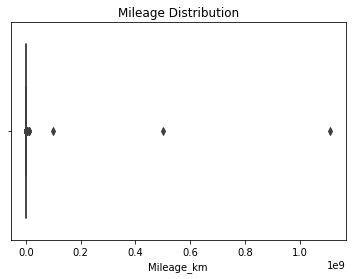

In [ ]:
sns.boxplot( data= data, x=data["Mileage_km"] ).set(title='Mileage Distribution')

👆 Since we detected outliers in the Mileage_distribution,we'll handle them in the following code:


In [ ]:
#Finding the IQR
mile=data['Mileage_km']
percentile25 = mile.quantile(0.25)
percentile75 = mile.quantile(0.75)
iqr=percentile75-percentile25

In [ ]:
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
#Finding Outliers
mile > upper_limit
mile< lower_limit

In [ ]:
#Trimming
new_data =data[mile<upper_limit]
new_data

In [ ]:
#Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Mileage_km'])
plt.subplot(2,2,2)
sns.boxplot(data['Mileage_km'])
plt.subplot(2,2,3)
sns.distplot(new_data['Mileage_km'])
plt.subplot(2,2,4)
sns.boxplot(new_data['Mileage_km'])
plt.show()

In [ ]:
#Capping
new_df_cap = data.copy()
new_df_cap['Mileage_km'] = np.where(
    new_df_cap['Mileage_km'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Mileage_km'] < lower_limit,
        lower_limit,
        new_df_cap['Mileage_km']
    )
)

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Mileage_km'])
plt.subplot(2,2,2)
sns.boxplot(data['Mileage_km'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Mileage_km'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Mileage_km'])
plt.show()

[Text(0.5, 1.0, 'Power Distribution')]

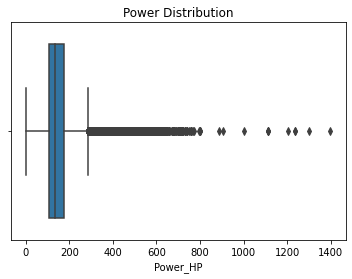

In [ ]:
sns.boxplot( data= data, x=data["Power_HP"] ).set(title='Power Distribution')

👆 Since we detected outliers in the Power_distribution, we'll handle them in the following code:


In [ ]:
#Finding the IQR
power=data['Power_HP']
percentile25 = power.quantile(0.25)
percentile75 = power.quantile(0.75)
iqr=percentile75-percentile25

In [ ]:
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
#Finding Outliers
power > upper_limit
power< lower_limit

In [ ]:
#Trimming
new_data =data[power<upper_limit]
new_data

In [ ]:
#Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Power_HP'])
plt.subplot(2,2,2)
sns.boxplot(data['Power_HP'])
plt.subplot(2,2,3)
sns.distplot(new_data['Power_HP'])
plt.subplot(2,2,4)
sns.boxplot(new_data['Power_HP'])
plt.show()

In [ ]:
#Capping
new_df_cap = data.copy()
new_df_cap['Power_HP'] = np.where(
    new_df_cap['Power_HP'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Power_HP'] < lower_limit,
        lower_limit,
        new_df_cap['Power_HP']
    )
)

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Power_HP'])
plt.subplot(2,2,2)
sns.boxplot(data['Power_HP'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Power_HP'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Power_HP'])
plt.show()

[Text(0.5, 1.0, 'Displacement Distribution')]

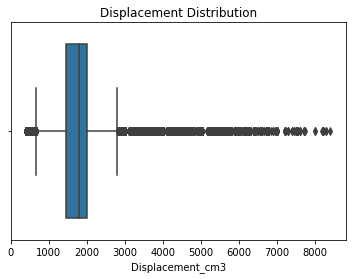

In [ ]:
sns.boxplot( data= data, x=data["Displacement_cm3"] ).set(title='Displacement Distribution')

👆 Since we detected outliers in the Displacement_distribution, we'll handle them in the following code:

In [ ]:
#Finding the IQR
disp=data['Displacement_cm3']
percentile25 = disp.quantile(0.25)
percentile75 = disp.quantile(0.75)
iqr=percentile75-percentile25

In [ ]:
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
#Finding Outliers
disp > upper_limit
disp< lower_limit

In [ ]:
#Trimming
new_data =data[disp<upper_limit]
new_data

In [ ]:
#Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Displacement_cm3'])
plt.subplot(2,2,2)
sns.boxplot(data['Displacement_cm3'])
plt.subplot(2,2,3)
sns.distplot(new_data['Displacement_cm3'])
plt.subplot(2,2,4)
sns.boxplot(new_data['Displacement_cm3'])
plt.show()

In [ ]:
#Capping
new_df_cap = data.copy()
new_df_cap['Displacement_cm3'] = np.where(
    new_df_cap['Displacement_cm3'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Displacement_cm3'] < lower_limit,
        lower_limit,
        new_df_cap['Displacement_cm3']
    )
)

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Displacement_cm3'])
plt.subplot(2,2,2)
sns.boxplot(data['Displacement_cm3'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Displacement_cm3'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Displacement_cm3'])
plt.show()

[Text(0.5, 1.0, 'CO2 emissions Distribution')]

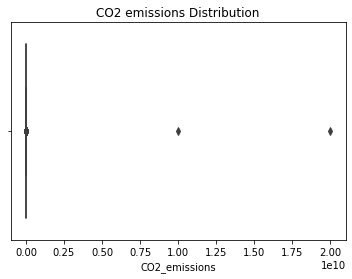

In [ ]:
sns.boxplot( data= data, x=data["CO2_emissions"] ).set(title='CO2 emissions Distribution')

👆 Since we detected outliers in the co2_emmissions_distribution, we'll handle them in the following code:

In [ ]:
#Finding the IQR
co2=data['CO2_emissions']
percentile25 = co2.quantile(0.25)
percentile75 = co2.quantile(0.75)
iqr=percentile75-percentile25

In [ ]:
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
#Finding Outliers
disp > upper_limit
disp< lower_limit

In [ ]:
#Trimming
new_data =data[co2<upper_limit]
new_data

In [ ]:
#Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['CO2_emissions'])
plt.subplot(2,2,2)
sns.boxplot(data['CO2_emissions'])
plt.subplot(2,2,3)
sns.distplot(new_data['CO2_emissions'])
plt.subplot(2,2,4)
sns.boxplot(new_data['CO2_emissions'])
plt.show()

In [ ]:
#Capping
new_df_cap = data.copy()
new_df_cap['CO2_emissions'] = np.where(
    new_df_cap['CO2_emissions'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['CO2_emissions'] < lower_limit,
        lower_limit,
        new_df_cap['CO2_emissions']
    )
)

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['CO2_emissions'])
plt.subplot(2,2,2)
sns.boxplot(data['CO2_emissions'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['CO2_emissions'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['CO2_emissions'])
plt.show()

[Text(0.5, 1.0, 'Doors number Distribution')]

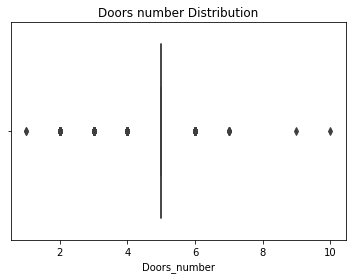

In [ ]:
sns.boxplot( data= data, x=data["Doors_number"] ).set(title='Doors number Distribution')

👆 Since we detected outliers in the doors_number_distribution, we'll handle them in the following code:

In [ ]:
#Finding the IQR
doors=data['Doors_number']
percentile25 = doors.quantile(0.25)
percentile75 = doors.quantile(0.75)
iqr=percentile75-percentile25

In [ ]:
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
#Finding Outliers
doors > upper_limit
doors< lower_limit

In [ ]:
#Trimming
new_data =data[doors<upper_limit]
new_data

In [ ]:
#Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Doors_number'])
plt.subplot(2,2,2)
sns.boxplot(data['Doors_number'])
plt.subplot(2,2,3)
sns.distplot(new_data['Doors_number'])
plt.subplot(2,2,4)
sns.boxplot(new_data['Doors_number'])
plt.show()

In [ ]:
#Capping
new_df_cap = data.copy()
new_df_cap['Doors_number'] = np.where(
    new_df_cap['Doors_number'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Doors_number'] < lower_limit,
        lower_limit,
        new_df_cap['Doors_number']
    )
)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

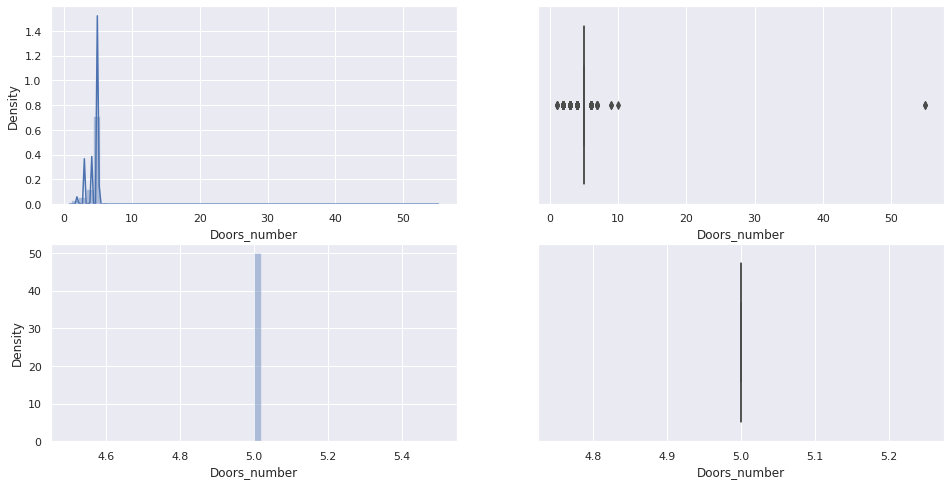

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Doors_number'])
plt.subplot(2,2,2)
sns.boxplot(data['Doors_number'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Doors_number'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Doors_number'])
plt.show()

👆We can see that almost,if not all, cars have 5 doors.

# **OUTLIERS -MULTIVARIATE:**

**1-Scatter Plot**

   If we take a look at a scatter plot, we can detect outliers by seeing the    points that are away from the majority of the data points.

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Displacement_cm3'], data['Price'])
ax.set_xlabel('Proportion of Displacement_cm3')
ax.set_ylabel('Price of Car')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Power_HP'], data['Price'])
ax.set_xlabel('Power in HP')
ax.set_ylabel('Price of Car')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Power_HP'], data['Price'])
ax.set_xlabel('Power in HP')
ax.set_ylabel('Price of Car')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Production_year'], data['Price'])
ax.set_xlabel('Year of production')
ax.set_ylabel('Price')
plt.show()

Farida's space
#1- which color has the highest price?
#2-relationship between average price and condition, brand
#3-what is the relation between co2 emission and fuel type, and year of production?

In [ ]:
pd.unique(data['Currency'])
pd.unique(data['Type'])
pd.unique(data['Origin_country'])
pd.unique(data['Drive'])
pd.unique(data['Vehicle_brand'])#108 brands


In [ ]:
data.count()

In [ ]:
nu_col = data.nunique()
print(nu_col)

In [ ]:
print(data.isnull().sum())

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
total_cars = np.product(data.shape)
total_missing_cars = data.isnull().sum()

# percent of data that is missing
percentage_missign_b = (total_missing_cars/total_cars) * 100
print(percentage_missign_b)


*we can observe that the percentage is very low since before that part we already handles the nulls and applied many techniques including various types of imputation so that we can work better results with our dataset*

#visualize the 15 most expensive vehicule brands

In [ ]:
plt.figure(figsize= (20,10))
nat_groups = data.groupby('Vehicle_brand')['Price'].mean().sort_values()[-15:]
nat_groups
sns.barplot(x=nat_groups.index,y= nat_groups.values)

#Plot below is aimed to visualize which colour of cars has the highest price

In [ ]:
#Research question 1
plt.figure(figsize= (20,10))
nat_groups = data.groupby('Colour')['Price'].mean().sort_values()[-14:]
nat_groups
sns.barplot(x=nat_groups.index,y= nat_groups.values)

# Research question 1 conculsion
I wanted to find the most expensive colour of vehicules, and the least expensive one also thinking that the least expensive would be black or gray since in real life it is the most frequently seen color thus we can make a hypothesis that it is the least expensive; however based on the graph above it is not exactly the case since the least expensive color violet.
I also wanted to see the frequency of each color to test the hypothesis of frenquency and in fact the 2 most frenquent colors where black and gray.
In conclusion we can infere that people buy the black and gray color in vehicule due to actually prefering the color and not based on the price aspect.

In [ ]:
data.groupby('Colour')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")


#to see 15 least expensive vehicule brands

In [ ]:
plt.figure(figsize= (20,10))
nat_groups = data.groupby('Vehicle_brand')['Price'].mean().sort_values()[:15]
nat_groups
sns.barplot(x=nat_groups.index,y= nat_groups.values)

# based on our reasearch question: that nowadays since there is a major focus on the environement thus we assumed that many brans especially expensive brands will focus more on decreasing the Co2 emissions of their cars.
through the following 2 graphs we wanted to discover if our hypothesis is accepted or not.

In [ ]:
#plt.figure(figsize= (25,10))
#nat_groups = data.groupby('Vehicle_brand')['CO2_emissions'].sum().sort_values()[:50]
#nat_groups
#sns.barplot(x=nat_groups.index,y= nat_groups.values)

data.groupby('Vehicle_brand')['CO2_emissions'].mean().sort_values(ascending=False).head(70).plot.bar(figsize=(25,10))

Based on the graph above visualizing the Co2 emission of the most expensive brands we can concluse that the most expensive actually has the high rate of emission, thus our hypothesis is rejected.

In [ ]:
#plt.figure(figsize= (25,10))
#nat_groups = data.groupby('Production_year')['CO2_emissions'].sum().sort_values()
#nat_groups
#sns.barplot(x=nat_groups.index,y= nat_groups.values)
data.groupby('Production_year')['CO2_emissions'].sum().sort_values(ascending=True).head(100).plot.bar(figsize=(25,10))

#this visualization aims to show to difference between the average price of used cars in comparaison to average price of new cars with respect to each vehicule brand; we want to highlight this difference and compare it with the other brands

In [ ]:
data['Vehicle_brand'].unique()
data1=data.head(40000)

In [ ]:
#reasearch question 2
sns.barplot(data=data1, x="Price", y="Vehicle_brand", hue="Condition").set(title='Difference in price between Used and New cars')

# Research question 2 conclusion
Based on the graph above we can observe that in our dataset we have mostly a big and remarkable difference in price between new and used cars; we also have some brands in which we only have used cars available these brands include Aston Martin, Acura which are from our top 15 most expensive brands (even though they are used). Also we have Bentley which has the most expensive price in both new and used cars, it is relatively a high price for used cars howvwer an extremely high price for its new cars.

In [ ]:
data.groupby('Condition')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")

In [ ]:
#research question 3
sns.lineplot(data=data, x="Production_year", y="CO2_emissions", hue="Transmission")

In [ ]:
data.groupby('Transmission')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")

# Research question 3 conclusion
here we show that 63.9% of the total CO2 emission is produced by manual vehicule in contrast to 36.1% by the automatic vehicules, however since the difference is not huge between the 2 and since we know that we have 133162 manual vehicules in our dataset in contrast to 75142 automatic vehicules we can assume that the different is not related to the vehicule itself being manual or automatic it is more related to the number of records collected for each type.

In [ ]:
print(data['Transmission'].value_counts()['Manual'])
print(data['Transmission'].value_counts()['Automatic'])


 **maryam's space** ✨

In [ ]:
# Research Questions
# 1-Difference between Automatic and Manual for sold for top 10 brands
# 2- Difference between Automatic and Manual for milege for top 10 brands

**RQ1: Difference between Automatic and Manual for sold for top 10 brands **


In [ ]:
pd.unique(data['Transmission'])

We notice here that there are only two types of transmission : Manual and Automatic for the whole dataset 👆🏻

In [ ]:
pd.unique(data['Vehicle_brand']) #108 brand

here we found that there are 108 unique car brand 👆🏻

In [ ]:
# top brand =  Volkswagen
pd.unique(data['Vehicle_brand'])
data['Vehicle_brand'].describe()

the top brand in the whole dataset is BMW👆🏻

In [ ]:
# top 10 brands with corresponding prices
data.groupby('Vehicle_brand')['Index'].count().sort_values(ascending=False).head(10).plot.bar(figsize=(20,10)).set(title=' Top 10 brands')

In order to visualize our data according to the top 10 brands, first, we need to find the top 10 brands of the dataset as shown above👆🏻

In [ ]:
new = data.groupby('Vehicle_brand')['Index'].count().sort_values(ascending=False).head(10)
new.index

In order to plug in our 10 brands as a data, we need to store it in a new data so we can plug it in our graph 👆🏻

In [ ]:
r1 = data[data['Vehicle_brand'].isin(new.index)]
r1.head()

Resulting of the top 10 brands in a new dataset👆🏻

In [ ]:
#difference of manu/auto
sns.barplot(data=r1, x="Price", y="Vehicle_brand", hue="Transmission").set(title='Difference between Automatic and Manual for sold for top 10 brands')

we find that the cars of type Automatic are having a higher price
than the Manual cars, which shows that automatic cars are better than the manual cars for these top 10 Brands.👆🏻

***RQ2: 2- Difference between Automatic and Manual for milege for top 10 brands***

In [ ]:
pd.unique(data['Transmission'])

We notice here that there are only two types of transmission : Manual and Automatic for the whole dataset 👆🏻

In [ ]:
pd.unique(data['Vehicle_brand']) #108 brand

here we found that there are 108 unique car brand 👆🏻

In [ ]:
data.groupby('Vehicle_brand')['Mileage_km'].count().sort_values(ascending=False).head(10).plot.bar(figsize=(20,10)).set(title='Top 10 brands with their corresponding mileage')

we found the top 10 car brand for the dataset which are: BMW, Audi, Opel, Ford, Mercedes-Benz, Renault, Skoda, Peugeot, Citroen, and Kia. These brands are sorted descendingly from left to write according to their mileage. Where BMW having the hight value of mileage while Kia is the lowest value 👆🏻

In [ ]:
sns.barplot(data=r1, x="Mileage_km", y="Vehicle_brand", hue="Transmission").set(title='Difference between Automatic and Manual for mileage for top 10 brands')

we find that Manual cars have a higher Mileage than the Automatic cars, meaning that Manual cars are lower in quality than the Automatic cars as shown for the Top 10 Brands 👆🏻

In [ ]:
sns.set_theme(style="darkgrid")
sns.lineplot(data=r1, x="Vehicle_brand", y="Mileage_km", hue="Transmission").set(title='Difference between Automatic and Manual for mileage for top 10 brands')

Different visualization 👆🏻

menna's space ⚡


In [ ]:
#1-do different countries aim to add their own touches to their brands?
#2-condition vs price vs mileage_km

# **this graph is to visulaize the relation between price and mileage. the more miles traveled by a car, the more its price should be reduced.we will also consider the car's condition  **.

In [ ]:
data['Price']

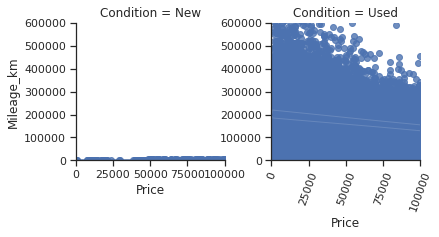

In [ ]:
#2nd research question
sns.set_theme(style="ticks")
# Show the results of a linear regression within each dataset
plot = sns.lmplot(data=data, x="Price", y="Mileage_km",
    col="Condition", height=3,
    facet_kws=dict(sharex=False, sharey=False))
plot.set(ylim=(0, 600000)) # to exclude outlier on BMW
plot.set(xlim=(0, 100000)) # to exclude outlier on Volkswagen
plt.xticks(rotation=70)

plt.show()


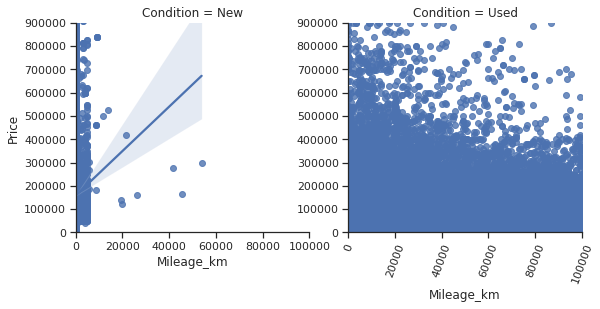

In [ ]:
plot = sns.lmplot(data=data, x="Mileage_km", y="Price",
    col="Condition", height=4,
    facet_kws=dict(sharex=False, sharey=False) )
plt.ticklabel_format(style='plain')
plt.xticks(rotation=70)
plot.set(ylim=(0, 900000)) # to exclude outlier on BMW
plot.set(xlim=(0, 100000)) # to exclude outlier on Volkswagen

plt.show()
#price has a very large range when condition='New',this mainly depends on the brand of each car
#should handle outliers in price and mileage



👆price and mileage are non-propotinal,meaning the more miles a car travels, the less its price becomes.


In [ ]:
#1st research question

above_35 = data[(data["Type"] == "sedan")| (data["Type"]== "SUV")]
above_35.head()


In [ ]:
data['Origin_country'].unique()
#i added more countries-->(France,Canada,and Austria)
new=data[(data['Origin_country']=='Poland')|(data['Origin_country']=='Germany')|(data['Origin_country']=='France')|(data['Origin_country']=='Canada')|(data['Origin_country']=='Austria')]

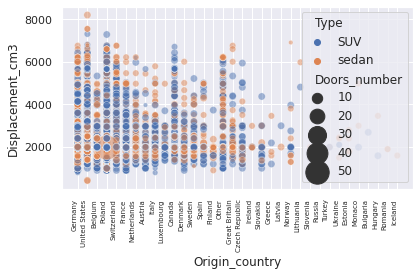

In [ ]:
#sns.scatterplot(data=data, x="Origin_country", y="Type", size="Doors_number", legend=False, sizes=(20, 2000))
sns.set_style("darkgrid")
x1=sns.scatterplot(data=above_35, x="Origin_country", y="Displacement_cm3", size=("Doors_number"), hue="Type", alpha=0.5, sizes=(20, 600))
plt.setp(x1.get_xticklabels(), rotation=90,fontsize = 7, ha="right")
plt.tight_layout()

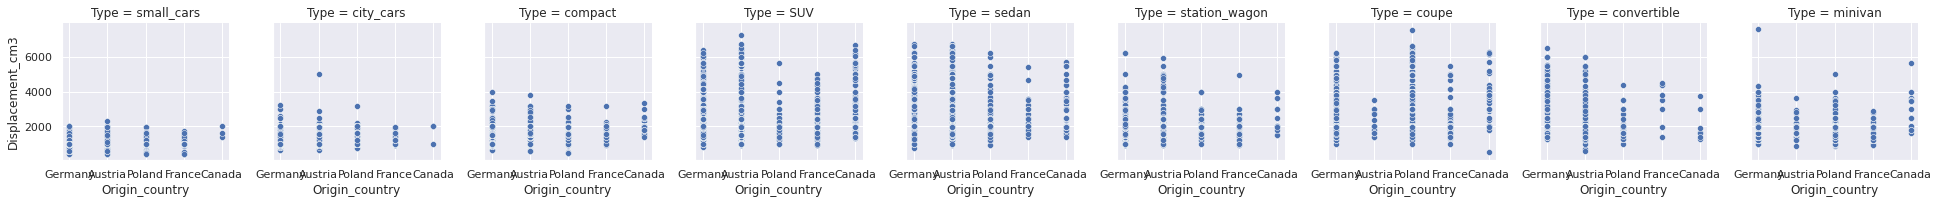

In [ ]:
g = sns.FacetGrid(new, col="Type")
#i changed the alignment of the graph and added the edgecolor and add_legend parts
g.map(sns.scatterplot,"Origin_country" ,"Displacement_cm3",edgecolor="w").add_legend()


👆We can see that Germany as a country perfers the sedan,SUV,and coupe car types and the engines are also are up to 6000cm3 and more in size. This refelects how they perfered robust and luxurious cars.
Moreover,Poland perfers SUV,coupe,sedan, and minivan. This may reflect that Poland has a variety of choices when is comes to cars(though they are more interested in small cars). However, engine sizes range from 4000-6000 and even above that.

In [ ]:
new=data.groupby(["Vehicle_brand","Vehicle_model"])["Price"].mean().sort_values()[-10:]
new

In [ ]:
data.Type.value_counts()


SUV              41587
station_wagon    40228
sedan            33271
compact          32150
city_cars        24110
minivan          22114
coupe             6374
small_cars        5974
convertible       2496
Name: Type, dtype: int64

[1 2 3 4]
[3, 6, 9, 12]
[1, 4, 9, 16]


<ipython-input-24-73cfbd8a5a42>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


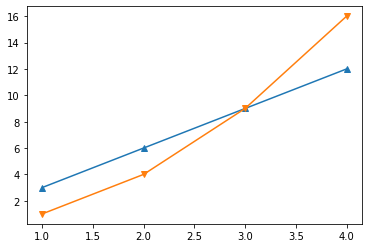

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
yx=fig.add_subplot()
ax = fig.add_subplot(1,1,1)
x = np.arange(1,5,1)
y = [a*3 for a in x ]
y1 = [a*a for a in x]
print(x)
print(y)
print(y1)

yx.plot(x,y,label ="Quatratic" , marker="^")
yx.plot(x,y1,label = "Cubic" , marker="v")
# ax.plot(x,y,label ="Quatratic" , marker="^")
# ax.plot(x,y1,label = "Cubic" , marker="v")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe17b32e4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe17b32eb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe17b32e160>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe17b339280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe17b339580>],
 'means': []}

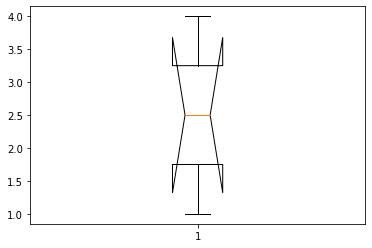

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[1,2,3,4];
y1=[80,60,90,50];
y2=[90,70,60,70];
y3=[60,80,90,40];
# ax.bar(x,y1,0.3, alpha=1.0)
# ax.bar(x,y2,0.6,alpha=0.7)
# ax.bar(x,y3,0.9,alpha=0.4)

# ax.scatter(x,y1)
# ax.scatter(x,y2)
# ax.scatter(x,y3)

ax.boxplot(x,y2)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


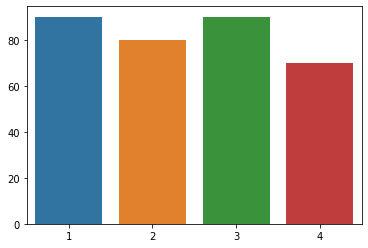

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
x=[1,2,3,4];
y1=[80,60,90,50];
y2=[90,70,60,70];
y3=[60,80,90,40];
y=[y1,y2,y3]

sns.barplot(x,y1)
sns.barplot(x,y2)
sns.barplot(x,y3)